<a href="https://colab.research.google.com/github/pmehta2612/Medibuddy_EDA_Project/blob/main/MediBuddy_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  - MediBuddy Project EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The Medibuddy Insurance Claim Analysis project aims to analyze the insurance claim data to derive meaningful insights into the factors influencing claim amounts, customer demographics, and spending patterns. The analysis also seeks to identify trends, detect outliers, and provide actionable recommendations to help optimize insurance policies, reduce risks, and enhance customer satisfaction. The project involves exploratory data analysis (EDA), feature engineering, and data visualization using Python.

# **GitHub Link -**

[MediBuddy EDA Project](https://github.com/pmehta2612/Medibuddy_EDA_Project/blob/main/MediBuddy_Project_EDA.ipynb)

# **Problem Statement**


The insurance industry faces significant challenges in managing rising claim costs, assessing risk factors, and optimizing policy pricing. Insurance companies must accurately evaluate the impact of customer demographics, lifestyle choices, and health indicators on claim amounts to ensure sustainable profitability and fair policy pricing.

In this project, we aim to analyze and explore insurance claim data to identify key factors influencing the amount of money spent by the company on each policy cover. By examining variables such as age, BMI, smoker status, region, and family size, the goal is to:

* Identify demographic groups with higher claim amounts.
* Detect risk factors (e.g., smoking or obesity) associated with larger claims.
* Understand how BMI, region, and number of children influence claim expenses.
* Provide data-driven insights for optimizing policy pricing and improving risk assessment models.

The insights from this analysis will help Medibuddy enhance its policy offerings, adjust premiums based on customer risk profiles, and make informed business decisions to improve overall profitability and customer satisfaction.

### **Define Your Business Objective?**

1. **Optimize Risk Assessment and Pricing:**

* Identify high-risk groups (e.g., smokers, individuals with high BMI) associated with larger claim amounts.

* Recommend premium adjustments based on risk factors to minimize financial losses and improve profitability.

2. **Enhance Policyholder Segmentation:**

* Classify customers into demographic segments (e.g., by age, region, BMI) to detect patterns in claim behavior.

* Enable the company to create targeted insurance plans and customized pricing models.

3. **Identify Cost-Intensive Factors:**

* Determine how lifestyle habits (smoking, BMI) and family size impact claim amounts.

* Provide insights to refine coverage policies and introduce tiered pricing structures.

4. **Improve Customer Retention and Satisfaction:**

* Use claim analysis to offer personalized policy recommendations based on individual risk profiles.

* Enhance customer satisfaction by providing fair and competitive premiums.

5. **Detect Outliers and Anomalies:**

* Identify unusually high claim amounts or suspicious patterns that may indicate fraudulent activities.

* Improve the company's fraud detection capabilities through data-driven insights.

6. **Data-Driven Decision-Making:**

* Empower the company with data-backed insights for strategic decisions, such as revising coverage limits or introducing new insurance products.

* Use predictive insights to forecast future claim trends and reduce financial risks.

These business objectives will help Medibuddy enhance its operational efficiency, improve financial stability, and offer better customer-centric insurance policies.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical data visualization
import warnings  # To handle warnings
# Ignore all warnings
warnings.filterwarnings("ignore")  # Suppresses all warnings from appearing

# Mount Google Drive to Access Files (Specific to Google Colab)
from google.colab import drive
drive.mount('/content/drive')   # Grants access to Google Drive storage

# Configure pandas display options
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame


Mounted at /content/drive


### Dataset Loading

In [2]:
# Load Dataset

# Function to load a Excel file into a pandas DataFrame
def load_excel(file_path):

    try:
        return pd.read_excel(file_path)  # Load the Excel file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
price_details = '/content/drive/MyDrive/MediBuddy_Project/Medibuddy Insurance Data Price (2).xlsx'  # File path for the 'Insurance Price' df
personal_details = '/content/drive/MyDrive/MediBuddy_Project/Medibuddy insurance data personal details (1).xlsx'  # File path for the 'Personal Details' df


# Load the dfs using the load_excel function
df1 = load_excel(file_path=price_details)  # Load price df
df2 = load_excel(file_path=personal_details)  # Load personal details df

In [3]:
# Merge the two dfs on the "Policy no. column"
merged_df = pd.merge(df1, df2, on="Policy no.")

### Dataset First View

In [4]:
# Dataset First Look
merged_df.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Number of Rows =",merged_df.shape[0])
print("Number of Columns =",merged_df.shape[1])

Number of Rows = 1338
Number of Columns = 8


### Dataset Information

In [6]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
 5   children        1338 non-null   int64  
 6   smoker          1338 non-null   object 
 7   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print("Number of Duplicates in Dataset =",merged_df.duplicated().sum())

Number of Duplicates in Dataset = 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print("Number of Null/Missing Values in Dataset =",merged_df.isnull().sum().sum())

Number of Null/Missing Values in Dataset = 0


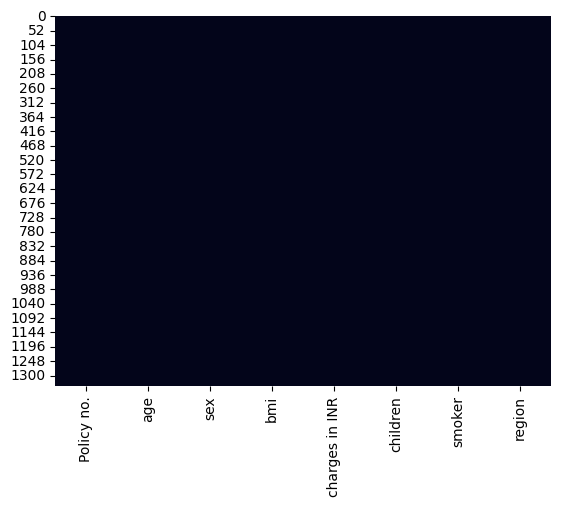

In [9]:
# Visualizing the missing values
sns.heatmap(merged_df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

The Medibuddy Insurance Claim dataset consists of 1338 records with details about insurance policyholders and their claim information. The dataset contains no duplicate or missing values, ensuring data integrity for analysis.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
merged_df.columns

Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR', 'children',
       'smoker', 'region'],
      dtype='object')

In [11]:
# Dataset Describe
merged_df.describe()

,age,bmi,charges in INR,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


### Variables Description

1. **Policy No:** Unique identifier for each policy.

2. **children:** Number of children per policyholder.

3. **smoker:** Indicates if the policyholder is a smoker.

4. **region:** Geographic region of the policyholder.

5. **Age:** Age of the policyholder.

6. **Sex:** Gender of the policyholder.

7. **BMI:** Measure of body fat based on height and weight.

8. **Charges in INR:** Claim amount in INR.

### Check Unique Values for each variable.

In [12]:
# Checking unique values for each column
print("Number of Unique values for each column in Dataset-")
print(merged_df.nunique())

Number of Unique values for each column in Dataset-
Policy no.        1338
age                 47
sex                  2
bmi                548
charges in INR    1337
children             6
smoker               2
region               4
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your df analysis ready.
# 1. Create a copy of the original DataFrame
df = merged_df.copy()

In [14]:
# 2. Standardizing Data Types and Formats
df['bmi'] = df['bmi'].round(2)
df['charges in INR'] = df['charges in INR'].round(2)

In [15]:
# 3. Creating binary flag for smoker column
df['smoker_flag'] = df['smoker'].map({'yes': 1, 'no': 0})

In [16]:
# 4. Creating Age Groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

In [17]:
# 5. Creating BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['bmi'].apply(bmi_category)

In [18]:
# 6. Creating charges in INR Groups
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, float('inf')]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k+']
df['INR_Range'] = pd.cut(df['charges in INR'], bins=bins, labels=labels)

In [19]:
# 7. Creating categories for children
def children_category(x):
    if x == 0:
        return 'No Children'
    elif x <= 2:
        return '1-2 Children'
    else:
        return '3+ Children'

df['Children_Category'] = df['children'].apply(children_category)

In [20]:
# 8. Average Amount Claimed for each policy
average_amount_claimed = df.groupby('Policy no.')['charges in INR'].mean()

In [21]:
# 9. Calculating Claim per BMI
df['Claim_Per_BMI'] = df['charges in INR'] / df['bmi']

In [22]:
# View cleaned dataset
df.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region,smoker_flag,Age_Group,BMI_Category,INR_Range,Children_Category,Claim_Per_BMI
0,PLC156898,19,female,27.90,16884.92,0,yes,southwest,1,18-29,Overweight,10k-20k,No Children,605.194265
1,PLC156907,18,male,33.77,1725.55,1,no,southeast,0,18-29,Obese,<10k,1-2 Children,51.097128
2,PLC156916,28,male,33.00,4449.46,3,no,southeast,0,18-29,Obese,<10k,3+ Children,134.832121
3,PLC156925,33,male,22.70,21984.47,0,no,northwest,0,30-39,Normal weight,20k-30k,No Children,968.478855
4,PLC156934,32,male,28.88,3866.86,0,no,northwest,0,30-39,Overweight,<10k,No Children,133.894044


### What all manipulations have you done and insights you found?

####**Manipulations-**
1. **Standardized Data Types:** Rounded BMI and Change in INR values to 2 decimal places for consistency.

2. **Binary Flags:** Created Smoker Flag (1 = Smoker, 0 = Non-smoker) for easier analysis.

3. **Age Groups:** Categorized Age into 5 groups (18-29, 30-39, etc.) for better segmentation.

4. **BMI Categories:** Classified BMI into underweight, normal, overweight, and obese.

5. **INR Ranges:** Grouped Charges in INR into ranges (e.g., less than 10k, 10k-20k, etc.) for better visualization.

6. **Children Categories:** Grouped children into No children, 1-2 children, and 3+ children.

7. **Average Claim per Policy:** Calculated the average amount claimed by each policyholder.

---

####**Insights Found-**
* Smokers have higher claim amounts, indicating a higher health risk.

* BMI impacts claim costs, obese individuals tend to have higher claims.

* Age groups 40-59 show higher average claim amounts, suggesting increased health expenses with age.

* Families with more children tend to claim higher amounts, indicating larger family expenses.

* High INR claims (>40k) are more frequent among older policyholders and smokers.

These insights help in risk assessment, policy pricing adjustments, and customer segmentation.

## **4. Data Visualization**

In [23]:
# Setting Visualization Style
plt.style.use('ggplot')

###**Question - 1. Does the gender of the person matter for the company as a constraint for extending policies?**

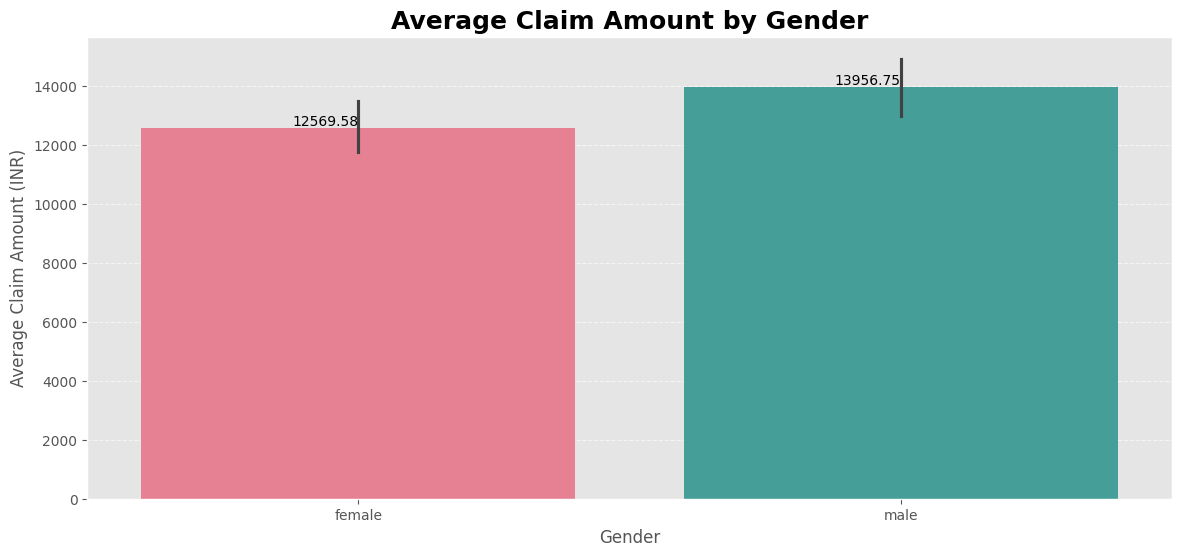

In [24]:
# Setting figure size
plt.figure(figsize=(14, 6))

# Bar plot for average claim amount by gender
sns.barplot(x='sex', y='charges in INR', data=df, palette='husl')

# Adding labels and title
plt.title('Average Claim Amount by Gender', fontsize=18, fontweight = 'bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Claim Amount (INR)', fontsize=12)

# Displaying the values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='right', va='bottom', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Answer-**

* From the visualization, gender does not appear to be a major constraint for extending policies.
* The average claim amount for males (₹13,956.75) is slightly higher than that for females (₹12,569.58).

However, the difference is not significant, indicating that gender likely has minimal impact on policy extension decisions.

###**Question - 2. What is the average amount of money the company spent over each policy cover?**

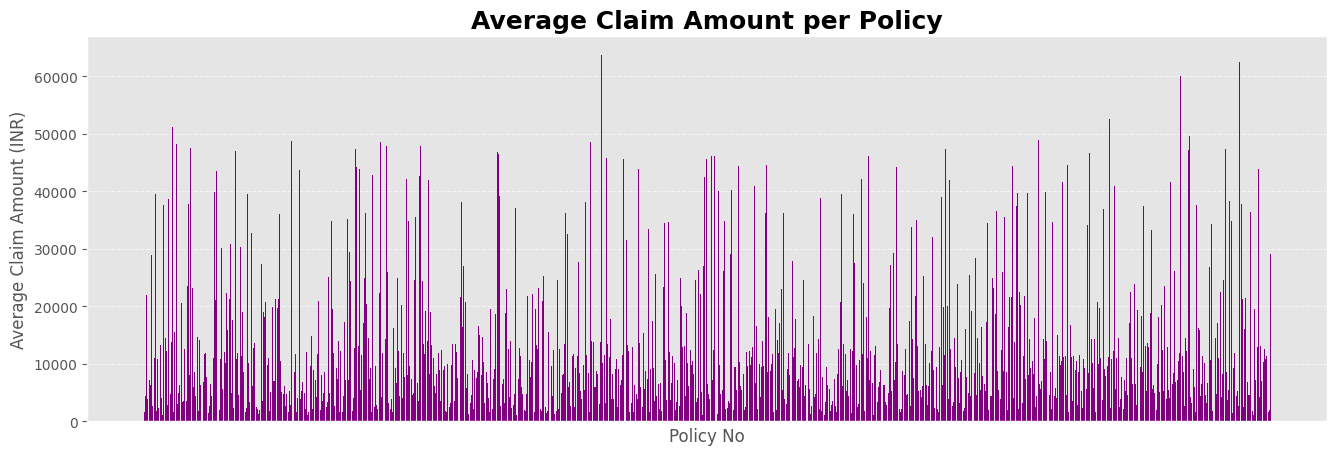

In [25]:
# Average Claim Amount per Policy (Bar Plot)
# Grouping by policy and calculating average claim
avg_claim = df.groupby('Policy no.')['charges in INR'].mean().reset_index()

# Set figure size
plt.figure(figsize=(16, 5))

# Plotting bar chart
plt.bar(avg_claim['Policy no.'].astype(str), avg_claim['charges in INR'], color='purple')

# Adding labels and title
plt.xlabel('Policy No', fontsize=12)
plt.ylabel('Average Claim Amount (INR)', fontsize=12)
plt.title('Average Claim Amount per Policy', fontsize=18, fontweight = 'bold')

# Displaying only few policy numbers to avoid clutter
plt.xticks([])  # Hides x-ticks

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Answer-**

From the Bar Plot:
* The average claim amount varies significantly across different policies.
* Some policies have much higher claims, while others have relatively lower values, indicating irregular claim distribution.
* There is no uniformity in the average amount spent per policy.



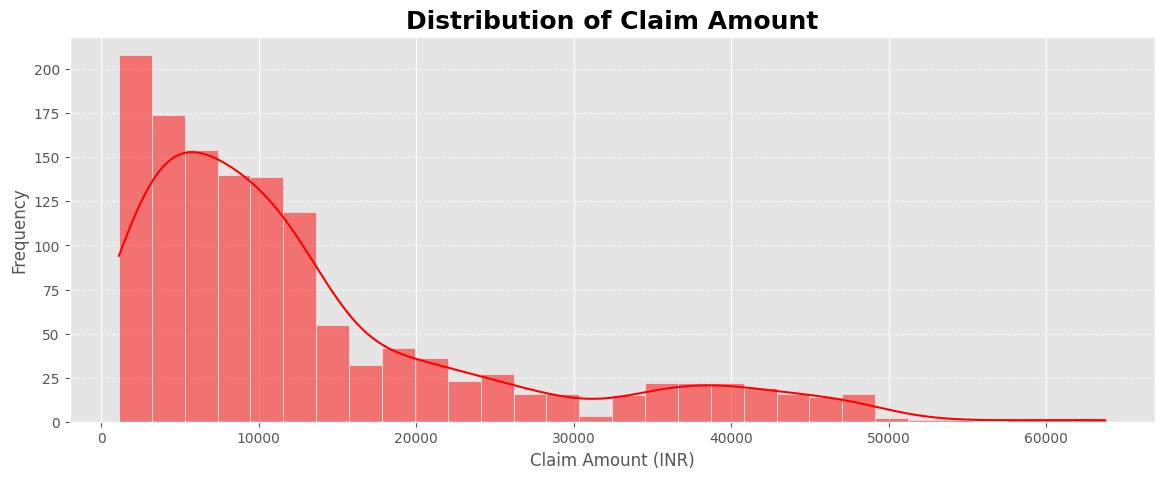

In [26]:
# Distribution of Claim Amount (Histogram)
# Set figure size
plt.figure(figsize=(14, 5))
# Plotting histogram
sns.histplot(df['charges in INR'], bins=30, kde=True, color='red')
# Adding labels and title
plt.title('Distribution of Claim Amount', fontsize=18, fontweight = 'bold')
plt.xlabel('Claim Amount (INR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Show Plot
plt.show()

**Answer-**

From the Histogram:
* The claim amount distribution is right-skewed, meaning most claims are on the lower side, with only a few high-value claims.
* The majority of claims fall below ₹20,000, while fewer claims exceed ₹40,000.
* This indicates that the company mostly spends smaller amounts on individual policies, with occasional large claims.

###**Question - 3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?**

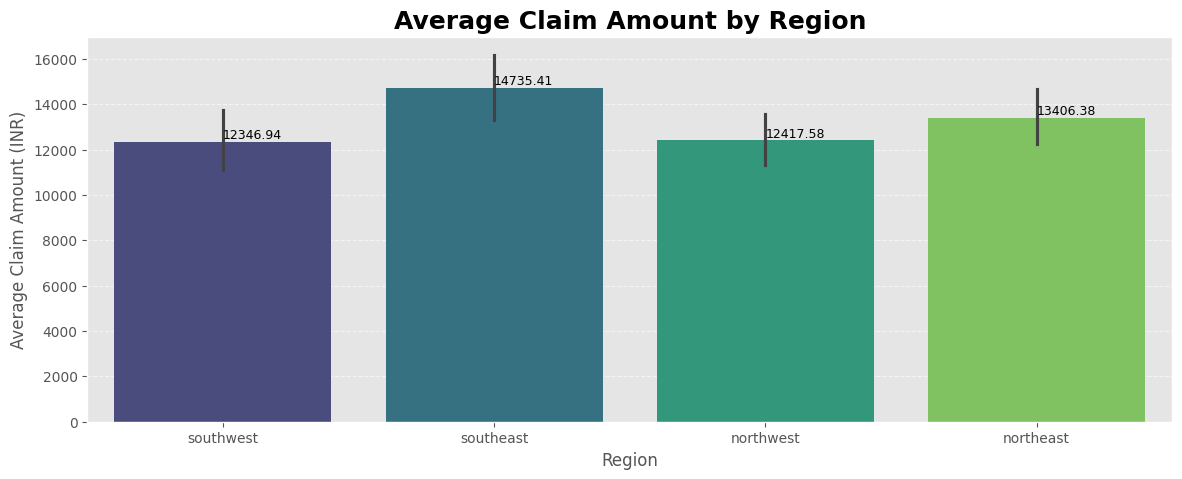

In [27]:
# Average Claim Amount by Region (Bar Plot)
# Set figure size
plt.figure(figsize=(14, 5))
# Plotting bar chart
sns.barplot(x='region', y='charges in INR', data=df, palette='viridis')

# Adding labels and title
plt.title('Average Claim Amount by Region', fontsize=18, fontweight = 'bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Claim Amount (INR)', fontsize=12)

# Displaying values on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='left', va='bottom', fontsize=9, color='black')
# Adding Grid
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Show Plot
plt.show()


**Answer-**

From the Bar Plot:
* The average claim amount varies by region, with the Southeast having the highest average claim amount (₹14,735.41), while the Southwest has the lowest (₹12,346.94).
* This suggests that regional factors may influence claim amounts, and separate policies or pricing strategies could be beneficial for different regions.

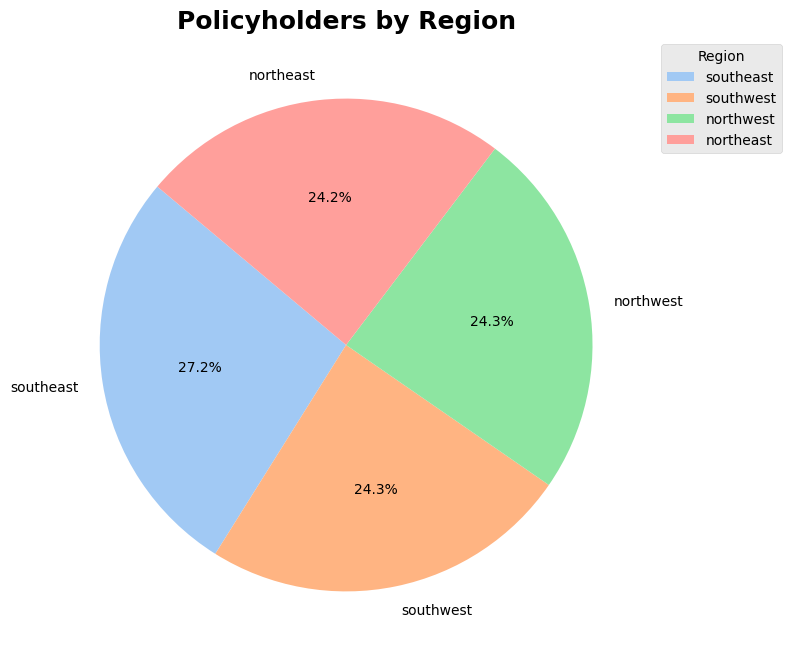

In [28]:
# Policyholder by Region (Pie Chart)
# Set figure size
plt.figure(figsize=(10, 8))
# Counting Regions
region_counts = df['region'].value_counts()
# Plotting pie chart
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
# Adding title
plt.title('Policyholders by Region', fontsize=18, fontweight = 'bold')
# Add Legend
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
# Show Plot
plt.show()

**Answer-**

From the Pie Chart:
* The distribution of policyholders across regions is fairly balanced, with the Southeast having a slightly larger share (27.2%), while the other regions are almost equally distributed (24%).

* Since the policyholder distribution is similar, the company could consider region-specific policy adjustments based on the claim amount differences rather than population distribution.









###**Question - 4. Does the no. of dependents make a difference in the amount claimed?**

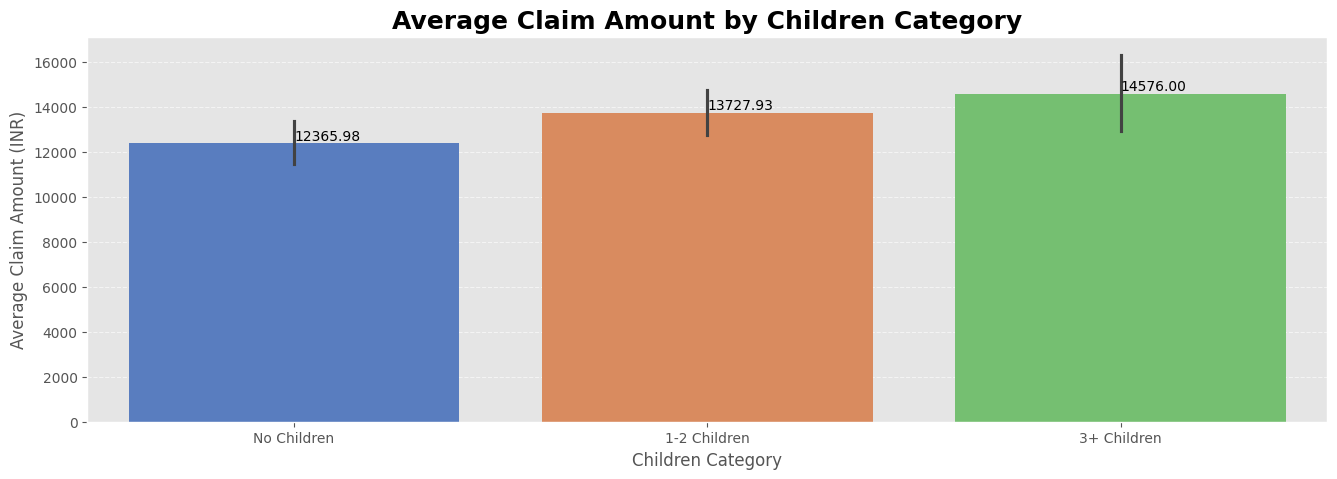

In [29]:
# Set Figure Size
plt.figure(figsize=(16, 5))
# Create Bar Plot
sns.barplot(x='Children_Category', y='charges in INR', data=df, palette='muted')

# Adding labels and title
plt.title('Average Claim Amount by Children Category', fontsize=18, fontweight = 'bold')
plt.xlabel('Children Category', fontsize=12)
plt.ylabel('Average Claim Amount (INR)', fontsize=12)

# Displaying values on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='left', va='bottom', fontsize=10, color='black')
# Adding Grid
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Show Plot
plt.show()


**Answer-**

Yes, the number of dependents (children) does make a difference in the amount claimed.
* Policyholders with more children tend to claim higher amounts.

* The average claim amount increases with the number of children:

  * No children: ₹12,365.98

  * 1-2 children: ₹13,727.93

  * 3+ children: ₹14,576.00

This indicates that families with more children have higher medical expenses, resulting in higher claim amounts.

###**Question - 5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?**

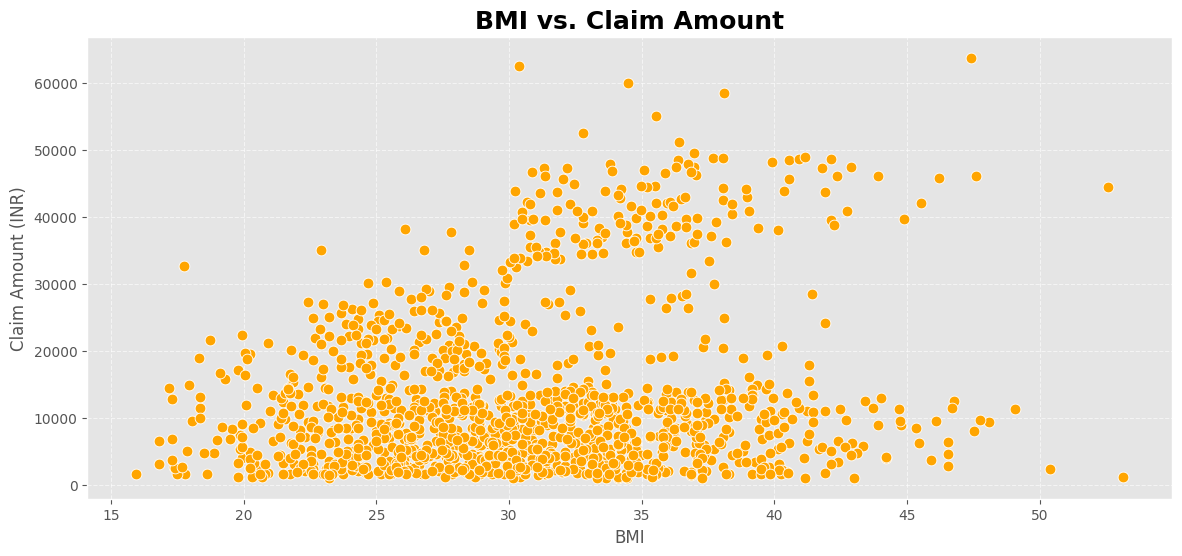

In [30]:
# Set Figure Size
plt.figure(figsize=(14, 6))

# Creating Scatter Plot
sns.scatterplot(x='bmi', y='charges in INR', data=df, color='orange', s = 60)

# Adding labels and title
plt.title('BMI vs. Claim Amount', fontsize=18, fontweight = 'bold')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Claim Amount (INR)', fontsize=12)

# Adding Grid
plt.grid(axis='both', linestyle='--', alpha=0.6)
# Show Plot
plt.show()

**Answer-**

Yes, the BMI study provides insights into the insurance claims.
* From the scatter plot, higher BMI values generally correspond to higher claim amounts, although there is some variation.

* Individuals with BMI above 30 (overweight and obese) tend to have more frequent and higher claims, indicating potential health risks and increased medical expenses.

This suggests that the company could consider BMI as a factor when determining policy coverage or pricing.

### **Question - 6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?**

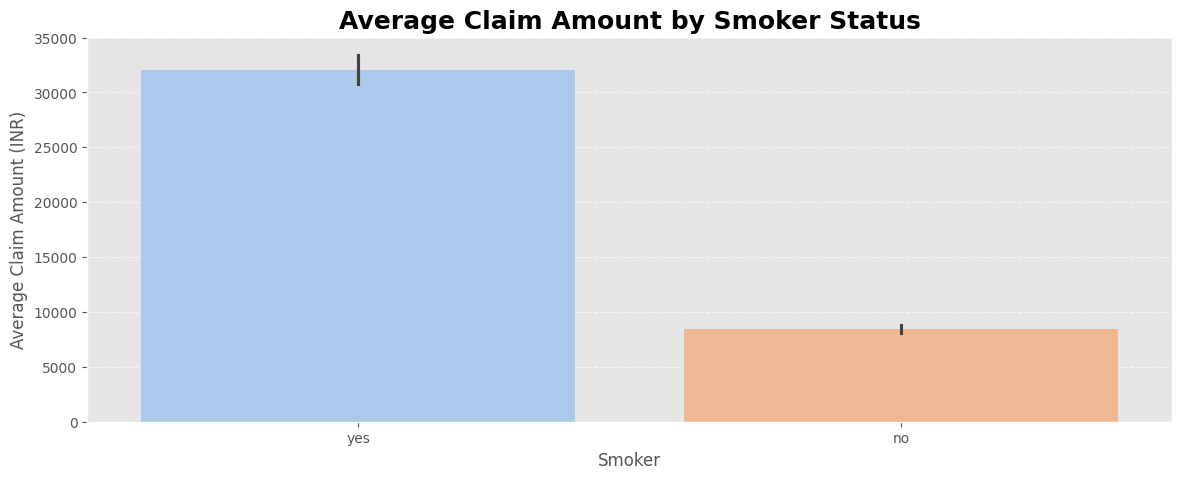

In [31]:
# Set Figure Size
plt.figure(figsize=(14, 5))

# Create Bar Plot
sns.barplot(x='smoker', y='charges in INR', data=df, palette='pastel')

# Adding labels and title
plt.title('Average Claim Amount by Smoker Status', fontsize=18, fontweight = 'bold')
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Average Claim Amount (INR)', fontsize=12)

# Adding Grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show Plot
plt.show()


**Answer-**

Yes, it is essential for the company to distinguish between smokers and non-smokers.
* The average claim amount for smokers (₹32,000+) is significantly higher compared to non-smokers (₹8,000+).

This indicates that smokers pose a higher risk and have greater medical expenses, making it crucial for the company to factor in smoker status when determining policy premiums and coverage.

### **Question - 7. Does age have any barrier on the insurance claimed?**

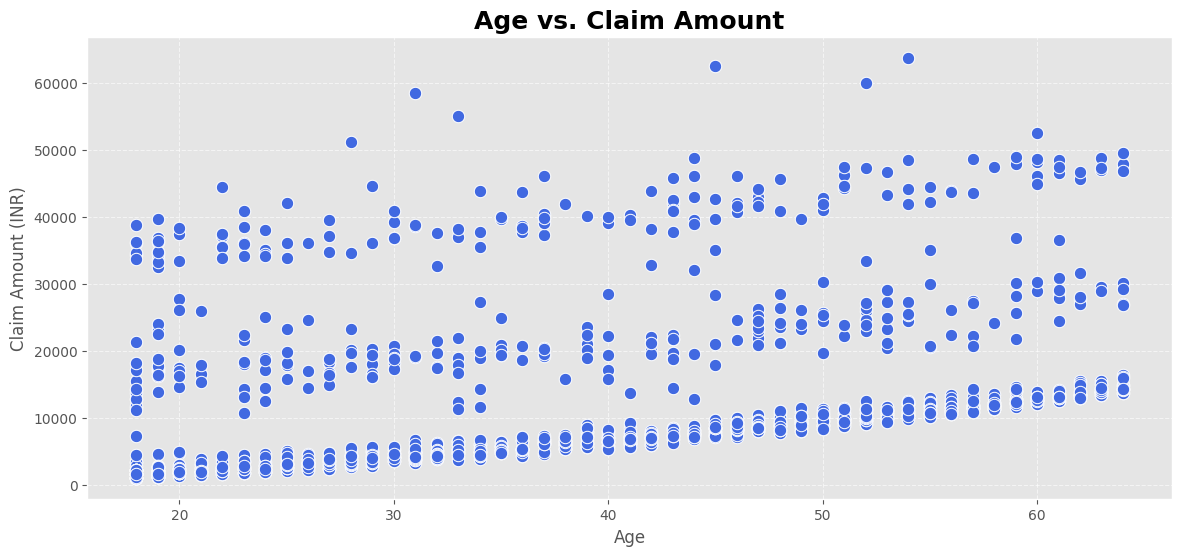

In [32]:
# Set Figure Size
plt.figure(figsize=(14, 6))

# Creating Scatter Plot
sns.scatterplot(x='age', y='charges in INR', data=df, color='royalblue', s = 80)

# Adding labels and title
plt.title('Age vs. Claim Amount', fontsize=18, fontweight = 'bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Claim Amount (INR)', fontsize=12)

# Adding Grid
plt.grid(axis='both', linestyle='--', alpha=0.6)
# Show Plot
plt.show()

**Answer-**

Yes, age does impact the insurance claimed.
* The visualization shows a positive correlation between age and claim amount.

* Older individuals tend to claim higher amounts, indicating higher medical expenses as age increases.

This suggests that the company should adjust policy premiums based on the age groups, as older policyholders are likely to require more coverage.

### **Question - 8. Can the company extend certain discounts after checking the health status (BMI) in this case?**

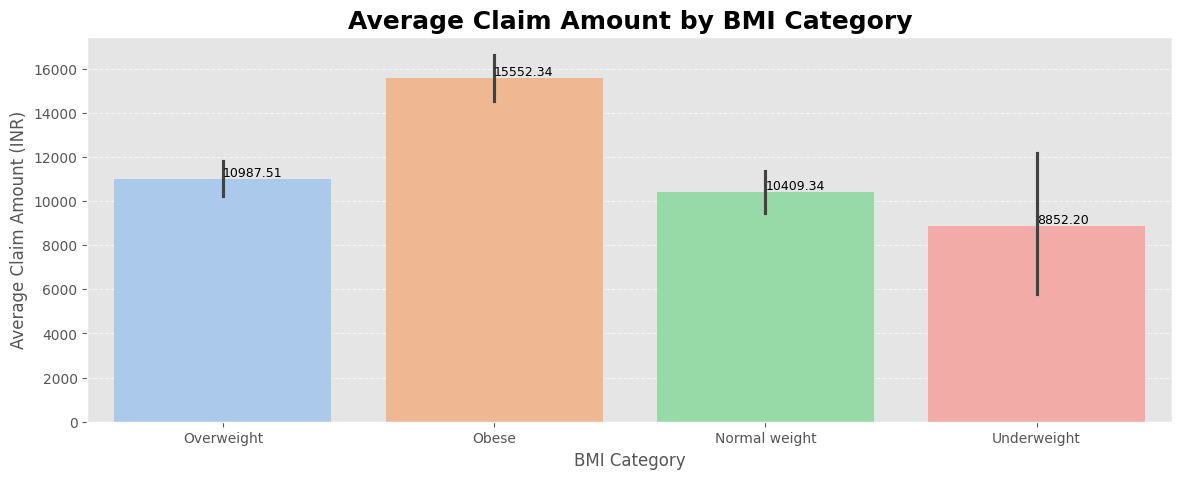

In [33]:
# Setting figure size
plt.figure(figsize=(14, 5))

# Bar plot for average claim amount by BMI category
sns.barplot(x='BMI_Category', y='charges in INR', data=df, palette='pastel')

# Adding labels and title
plt.title('Average Claim Amount by BMI Category', fontsize=18, fontweight = 'bold')
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Average Claim Amount (INR)', fontsize=12)

# Displaying data labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='left', va='bottom', fontsize=9, color='black')

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show Plot
plt.show()

**Answer-**

Yes, the company can extend certain discounts based on BMI categories.
* Obese individuals have the highest average claim amount (₹15,552.34), indicating higher health risks and greater medical expenses.

* Underweight individuals have the lowest claim amount (₹8,852.20), suggesting lower medical expenses.

* The company could offer discounts to healthier BMI groups (normal weight and underweight) to promote wellness and reduce overall claim costs.

* Higher premiums could be charged for obese policyholders due to their higher risk profile.

###**Correlation Heatmap**

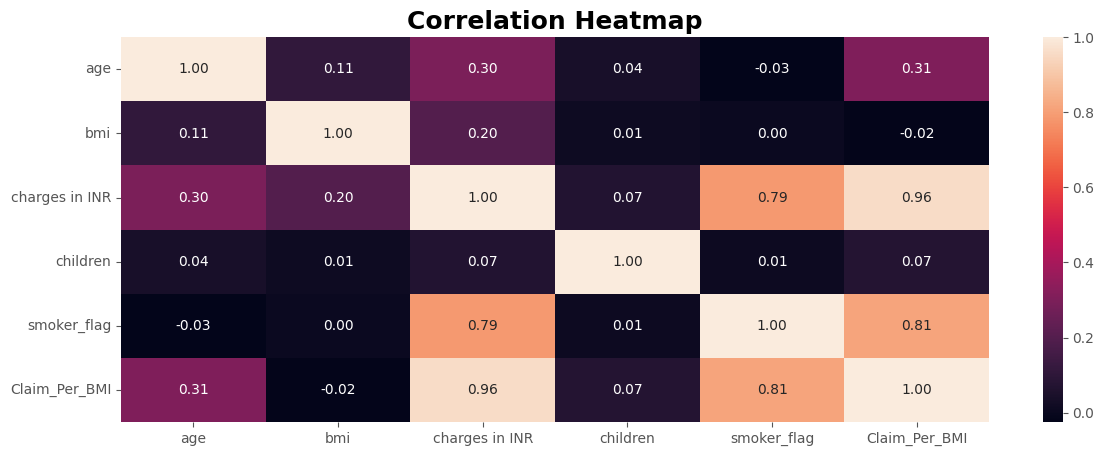

In [34]:
# Set Figure Size
plt.figure(figsize = (14,5))
# Creating Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True),annot = True, fmt = '.2f')
# Add Title
plt.title('Correlation Heatmap', fontsize=18, fontweight = 'bold')
# Show Plot
plt.show()

**Insights-**
1. **Strong Positive Correlation:**

* charges in INR and Claim_Per_BMI - 0.96:

  * As claim amount increases, the claim per BMI also rises significantly, indicating a direct relationship between total charges and BMI-based claim ratio.

* smoker_flag and charges in INR - 0.79:

  * Smokers tend to have higher claim amounts, confirming that smoking is a major factor influencing claim costs.

* smoker_flag and Claim_Per_BMI - 0.81:

  * Smokers have a higher claim per BMI, suggesting that smoking significantly contributes to increased insurance claims.

2. **Moderate Positive Correlation:**

* age and charges in INR - 0.30:

  * Older individuals tend to have higher claim amounts, indicating age-related health risks.

* age and Claim_Per_BMI - 0.31:

  * Older individuals also have higher claim per BMI, suggesting that claim amounts increase with both age and BMI.

3. **Weak or No Significant Correlation:**

* bmi and charges in INR - 0.20:

  * Weak correlation suggests that BMI alone is not a strong predictor of claim amount.

* children and charges in INR - 0.07:

  * The number of children has minimal impact on claim amounts, indicating that dependents do not significantly influence claim costs.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Some of the key recommendations for client to achieve business objectives are-

1. **Targeted Premium Pricing:**

* Charge higher premiums for smokers and obese individuals due to their higher claim amounts.

* Offer discounts to healthier BMI groups to encourage wellness and reduce claim costs.

2. **Region-Specific Policies:**

* Since southeast region has the highest average claims, introduce region-specific premiums or tailored policies.

3. **Family-Oriented Plans:**

* Policyholders with more dependents claim higher amounts. Introduce family-based insurance plans with flexible coverage options.

4. **Age-Based Coverage:**

* Offer age-specific plans with tailored benefits, as older individuals tend to have higher claim amounts.

5. **Customer Incentives:**

* Provide fitness incentives or health check-up discounts to reduce claims from high-risk individuals.









# **Conclusion**

The analysis reveals significant factors influencing insurance claim amounts. Smoker status and BMI category are the most impactful, with smokers and obese individuals claiming significantly higher amounts. Geographic location also plays a role, with the southeast region showing the highest average claims. Additionally, age and the number of dependents directly influence claim costs, with older individuals and larger families claiming more.

To optimize business outcomes, the company should consider implementing risk-based pricing models, offering discounts for healthier policyholders, and creating region-specific policies. By tailoring policies based on customer demographics and health profiles, the company can mitigate risks, improve profitability, and offer more personalized insurance plans.